In [1]:
import compnal
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from statistics import stdev, variance, median
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [2]:
degree = 3
J = -1.0
#h = -0.01
N_list = [4, 8, 16]
T_list = np.arange(2, 3, 0.1)

In [3]:
def gen_model(N: int, J: float, deg: int):
    interaction = {}
    if deg == 2:
        for i in range(N):
            for j in range(N):
                ind1 = (i, j)
                ind2 = (i, (j+1)%N)
                interaction[(ind1, ind2)] = J

                ind1 = (i, j)
                ind2 = ((i+1)%N, j)
                interaction[(ind1, ind2)] = J
    elif deg == 3:
        for i in range(N):
            for j in range(i+1, N):
                for k in range(j+1, N):
                    interaction[(i, j, k)] = J
    else:
        raise ValueError("deg error")
    return interaction

In [6]:
bind = []
for N in N_list:
    temp_bind = []
    interaction = gen_model(N, J, degree)
    for t in tqdm(T_list):
        lattice = compnal.lattice.Square(x_size=N, y_size=N)
        model = compnal.model.Ising(
            lattice=lattice,
            linear=0,
            quadratic=J
        )
        solver = compnal.solver.ClassicalMonteCarlo(
            model=model, 
        )
        solver.algorithm = compnal.compnal.solver.Algorithm.METROPOLIS
        solver.num_sweeps = 1000
        solver.num_samples = 10000
        solver.num_threads = 32
        solver.temperature = t
        solver.run()
        mm = solver.calculate_moment(2)
        mmmm = solver.calculate_moment(4)
        #temp_bind.append(calc_binder(solver.get_samples()))
        temp_bind.append(1 - mmmm/(3*mm*mm))
    bind.append(temp_bind)


100%|██████████| 10/10 [01:08<00:00,  6.83s/it]


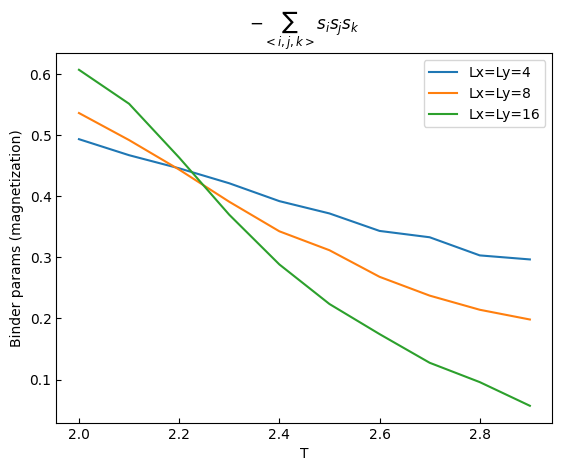

In [8]:
plt.plot(T_list, bind[0], label="Lx=Ly=4")
plt.plot(T_list, bind[1], label="Lx=Ly=8")
plt.plot(T_list, bind[2], label="Lx=Ly=16")
plt.xlabel("T")
plt.ylabel("Binder params (magnetization)")
plt.title("$-\sum_{<i,j,k>}s_is_js_k$")
plt.legend()